In [281]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [282]:
cash = pd.read_csv('./project_dataset/extract - cash request - data analyst.csv')
fees = pd.read_csv('./project_dataset/extract - fees - data analyst - .csv')
cash.head(10)

,id,amount,status,created_at,updated_at,user_id,moderated_at,deleted_account_id,reimbursement_date,cash_request_received_date,money_back_date,transfer_type,send_at,recovery_status,reco_creation,reco_last_update
0,5,100.0,rejected,2019-12-10 19:05:21.596873+00,2019-12-11 16:47:42.40783+00,804.0,2019-12-11 16:47:42.405646+00,NaN,2020-01-09 19:05:21.596363+00,NaN,NaN,regular,NaN,NaN,NaN,NaN
1,70,100.0,rejected,2019-12-10 19:50:12.34778+00,2019-12-11 14:24:22.900054+00,231.0,2019-12-11 14:24:22.897988+00,NaN,2020-01-09 19:50:12.34778+00,NaN,NaN,regular,NaN,NaN,NaN,NaN
2,7,100.0,rejected,2019-12-10 19:13:35.82546+00,2019-12-11 09:46:59.779773+00,191.0,2019-12-11 09:46:59.777728+00,NaN,2020-01-09 19:13:35.825041+00,NaN,NaN,regular,NaN,NaN,NaN,NaN
3,10,99.0,rejected,2019-12-10 19:16:10.880172+00,2019-12-18 14:26:18.136163+00,761.0,2019-12-18 14:26:18.128407+00,NaN,2020-01-09 19:16:10.879606+00,NaN,NaN,regular,NaN,NaN,NaN,NaN
4,1594,100.0,rejected,2020-05-06 09:59:38.877376+00,2020-05-07 09:21:55.34008+00,7686.0,2020-05-07 09:21:55.320193+00,NaN,2020-06-05 22:00:00+00,NaN,NaN,regular,NaN,NaN,NaN,NaN
5,2145,100.0,money_back,2020-05-23 20:58:55.129432+00,2020-07-06 03:36:03.023911+00,9489.0,2020-05-24 12:40:33.05491+00,NaN,2020-06-06 22:00:00+00,2020-05-26,2020-07-06 03:36:03.023521+00,regular,NaN,completed,2020-06-12 22:27:04.837525+00,2020-07-06 03:36:03.030904+00
6,3512,100.0,rejected,2020-06-16 17:07:38.452652+00,2020-06-17 10:21:21.364746+00,14631.0,2020-06-17 10:21:21.360742+00,NaN,2020-07-11 23:51:00+00,NaN,NaN,regular,NaN,NaN,NaN,NaN
7,654,100.0,rejected,2020-02-10 01:11:53.80827+00,2020-02-10 11:53:32.104131+00,NaN,2020-02-10 09:11:21.350695+00,309.0,2020-03-11 01:11:53.80793+00,NaN,NaN,regular,NaN,NaN,NaN,NaN
8,5672,100.0,canceled,2020-06-28 12:06:33.71284+00,2020-06-28 12:06:33.712853+00,NaN,NaN,2499.0,2020-07-07 22:00:00+00,NaN,NaN,regular,NaN,NaN,NaN,NaN
9,71,90.0,rejected,2019-12-10 19:51:23.911206+00,2019-12-12 15:06:11.192888+00,897.0,2019-12-12 15:06:11.190299+00,NaN,2019-12-17 19:51:23.910748+00,NaN,NaN,regular,NaN,NaN,NaN,NaN


In [283]:
# Convert 'created_at' to datetime
cash['created_at'] = pd.to_datetime(cash['created_at'])

# Create month and cohorte column
cash.sort_values(by='user_id', inplace=True)
cash['month'] = cash['created_at'].dt.to_period('M')
cash['cohortes'] = cash.groupby('user_id')['month'].transform('min')
cash[['cohortes', 'month', 'user_id']].head(10)

C:\Users\ivani\AppData\Local\Temp\ipykernel_3948\476692163.py:6: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  cash['month'] = cash['created_at'].dt.to_period('M')


,cohortes,month,user_id
538,2020-04,2020-04,34.0
91,2019-12,2020-02,35.0
345,2019-12,2020-01,35.0
5298,2019-12,2020-08,35.0
58,2019-12,2019-12,35.0
180,2019-12,2019-12,35.0
6842,2019-12,2020-09,35.0
670,2019-12,2020-03,35.0
1037,2019-11,2020-08,47.0
445,2019-11,2020-04,47.0


In [284]:
table = cash.groupby('cohortes').agg(user_id = ('user_id', 'nunique'))
new_table = cash.groupby('cohortes')['user_id'].nunique()
new_table

cohortes
2019-11       1
2019-12     204
2020-01      90
2020-02      84
2020-03      69
2020-04     212
2020-05     369
2020-06    1338
2020-07    1294
2020-08     656
2020-09    1712
2020-10    4694
2020-11      75
Freq: M, Name: user_id, dtype: int64

In [285]:
table_month = cash.groupby(['cohortes', 'month']).agg(clientes = ('user_id', 'nunique')).reset_index()
new_table_month = cash.groupby(['cohortes', 'month'])['user_id'].nunique()
new_table_month

cohortes  month  
2019-11   2019-11       1
          2019-12       1
          2020-04       1
          2020-05       1
          2020-08       1
                     ... 
2020-09   2020-10     660
          2020-11      20
2020-10   2020-10    4694
          2020-11      15
2020-11   2020-11      75
Name: user_id, Length: 83, dtype: int64

In [286]:
pivot_unitial = table_month.groupby('cohortes').first()
pivot_unitial

,month,clientes
cohortes,,
2019-11,2019-11,1
2019-12,2019-12,204
2020-01,2020-01,90
2020-02,2020-02,84
2020-03,2020-03,69
2020-04,2020-04,212
2020-05,2020-05,369
2020-06,2020-06,1338
2020-07,2020-07,1294


In [293]:
retention = table_month.pivot(index='cohortes', columns='month', values='clientes').div(pivot_unitial['clientes'], axis=0)
retention = retention * 100
retention

month,2019-11,2019-12,2020-01,2020-02,2020-03,2020-04,2020-05,2020-06,2020-07,2020-08,2020-09,2020-10,2020-11
cohortes,,,,,,,,,,,,,
2019-11,100.0,100.0,NaN,NaN,NaN,100.000000,100.000000,NaN,NaN,100.000000,100.000000,100.000000,NaN
2019-12,NaN,100.0,33.823529,21.568627,27.450980,25.980392,32.352941,28.921569,25.490196,30.882353,20.588235,28.921569,0.490196
2020-01,NaN,NaN,100.000000,21.111111,15.555556,30.000000,25.555556,26.666667,30.000000,23.333333,22.222222,25.555556,1.111111
2020-02,NaN,NaN,NaN,100.000000,52.380952,48.809524,48.809524,45.238095,42.857143,42.857143,29.761905,41.666667,NaN
2020-03,NaN,NaN,NaN,NaN,100.000000,50.724638,46.376812,59.420290,43.478261,40.579710,37.681159,39.130435,1.449275
2020-04,NaN,NaN,NaN,NaN,NaN,100.000000,49.056604,50.943396,39.622642,35.849057,31.132075,27.830189,NaN
2020-05,NaN,NaN,NaN,NaN,NaN,NaN,100.000000,61.517615,53.658537,45.257453,34.688347,40.108401,0.813008
2020-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.000000,52.092676,51.569507,40.358744,40.508221,0.298954
2020-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.000000,49.922720,37.403400,39.489954,0.540958


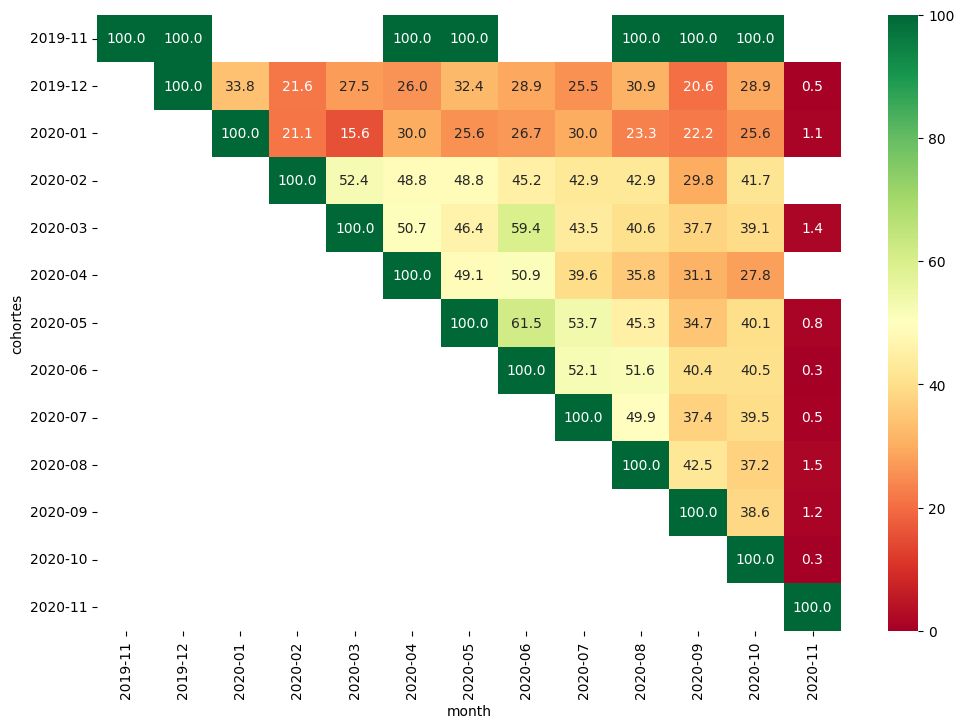

In [291]:
plt.figure(figsize=(12,8))
sns.heatmap(retention, annot=True, fmt=".1f", cmap="RdYlGn", vmin=0, vmax=100)
plt.show()

<Axes: title={'center': 'INCOME PER COHORTE'}, xlabel='Cohortes', ylabel='Total Amount'>

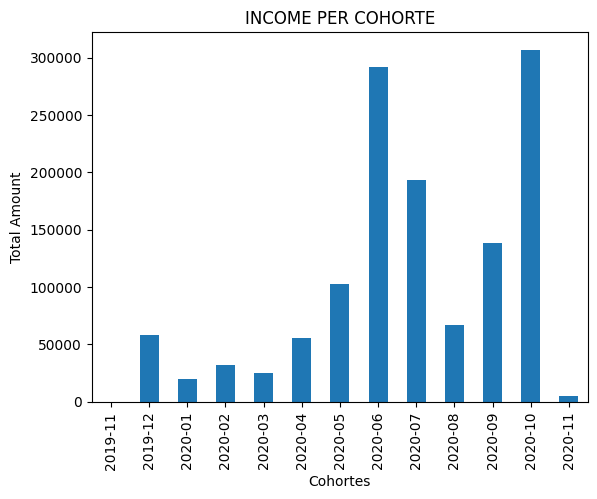

In [289]:
# Income generated per cohorte
income_cohorte = cash[cash['status'] == 'money_back'].groupby('cohortes')['amount'].sum()
income_cohorte.plot(kind='bar', ylabel= 'Total Amount', xlabel='Cohortes', title='INCOME PER COHORTE')